In [12]:
import matplotlib.pyplot as plt
import pandas as pd


1. Define a function named get_lower_and_upper_bounds that has two arguments. 
    - The first argument is a pandas Series. 
    - The second argument is the multiplier, which should have a default argument of 1.5.

In [33]:
def get_lower_and_upper_bounds(num, multiplier = 1.5):
    '''
    Takes in a panda Series, and a Multiplier (default: 1.5)
    Finds the four quartiles, Interquartile Range (Q3 - Q1), Lower bound with Q1 - (IQR * [multiplier]), and Upper bound with Q3 + (IQR * [multiplier])
    '''
    # Turkey Rules!
    # s_range = pd_series.max() - pd_series.min()
    # quartile = s_range * .25
    # q1 = pd_series.min() + quartile
    # q3 = pd_series.max() - quartile
    low = num[num < num.median()]
    q1 = low.median()
    high = num[num > num.median()]
    q3 = high.median()
    iqr = q3 - q1
    lower = q1 - (iqr * multiplier)
    upper = q3 + (iqr * multiplier)
    return lower, upper

In [37]:
num= pd.Series([1,2,3,4,5,6,6,7,8,12,15])

In [44]:
num[num > num.median()]

7      7
8      8
9     12
10    15
dtype: int64

In [47]:
# Double Checking!
q1 = 3
q3 = 10
iqr = 7
lower = q1 - (iqr * 1.5)
upper = q3 + (iqr * 1.5)
lower, upper
# Checked and it works for both odd and even. Def does too!

(-7.5, 20.5)

In [48]:
lower, upper = get_lower_and_upper_bounds(num)
lower, upper

(-7.5, 20.5)

##### Using lemonade.csv dataset and focusing on continuous variables:

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
- Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?
- Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?
- Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

##### Use a 2 sigma decision rule to isolate the outliers.

- Do these make sense?
- Should certain outliers be kept or removed?

Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [7]:
df = pd.read_csv("lemonade.csv")

In [8]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.865753,30.948132,7.0,20.00,25.00,30.00,534.0


Visualisation is Key
- Box Plots
    - See https://matplotlib.org/3.1.1/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
    - This tutorial is a helpful guide: http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
- Scatter Plots
- Plot a Histogram
    - Super Quick Pandas Method (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)

<AxesSubplot:>

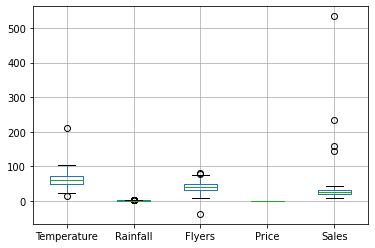

In [64]:
df.boxplot()

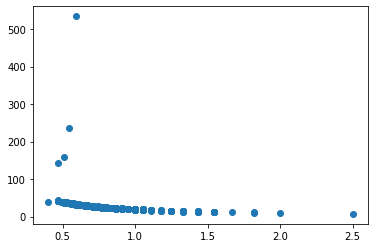

In [67]:
plt.scatter(data = df, x= "Rainfall", y = "Sales")

array([[<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Rainfall'}>],
       [<AxesSubplot:title={'center':'Flyers'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>]],
      dtype=object)

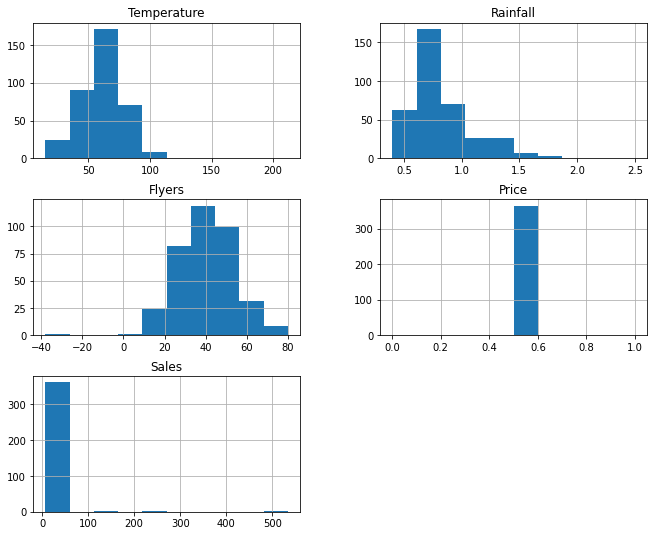

In [22]:
# Super Quick Pandas in Action!
df.hist(figsize= (11,9))

- Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [49]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [50]:
rain = pd.Series(df.Rainfall)
rain

0      2.00
1      1.33
2      1.33
3      1.05
4      1.00
       ... 
360    1.00
361    1.25
362    1.25
363    1.43
364    2.50
Name: Rainfall, Length: 365, dtype: float64

In [54]:
lower, upper = get_lower_and_upper_bounds(rain)
lower, upper

(0.20999999999999996, 1.33)

In [59]:
q1 = rain[rain < rain.median()].median()

In [60]:
q3 = rain[rain > rain.median()].median()

In [61]:
iqr = q3 - q1

In [63]:
l = q1 - (iqr * 1.5)
h = q3 + (iqr * 1.5)
l, h
# Still don't trust my maths function. So always checking

(0.20999999999999996, 1.33)